Importing packages

In [31]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Conv1D, Conv2D, Conv3D, MaxPooling1D,MaxPooling2D,MaxPooling3D, Flatten, BatchNormalization, Activation
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error
from keras.src.layers import TimeDistributed
from sklearn.model_selection import train_test_split

Importing data

In [5]:
x = np.loadtxt("data/Kimore/Kimore_ex1/Train_X.csv", delimiter=',')
y = np.loadtxt("data/Kimore/Kimore_ex1/Train_Y.csv", delimiter=',')

Shape for train_x & train_y
Reshaping train_x: 3D

In [6]:
def reshape_X(x_reshaped):
    
    x_reshaped=x.reshape(x.shape[0]//100,x.shape[1],100)
    return x_reshaped

def reshape_Y(y_reshaped):
    y_reshaped=y
    return y_reshaped

print(f"Shape for train_x:{x.shape}\n")
print(f"After reshaping train_x:{reshape_X(x).shape}\n")
print(f"Shape for train_y:{reshape_Y(y).shape}")

Shape for train_x:(47300, 100)

After reshaping train_x:(473, 100, 100)

Shape for train_y:(473,)


Training and Splitting dataset

In [7]:
# Splitting data to train, tes and validate
x_main, x_test, y_main, y_test = train_test_split(reshape_X(x),reshape_Y(y),test_size=0.2,random_state=42)

#validation split
x_train, x_val, y_train, y_val = train_test_split(x_main, y_main, test_size=0.2,random_state=42) 


print("X_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(x_val.shape))
print("y val shape: {}".format(y_val.shape))


X_train shape: (302, 100, 100)
y_train shape: (302,)
X_test shape: (95, 100, 100)
y_test shape: (95,)
X_val shape: (76, 100, 100)
y val shape: (76,)


Neural Network: LSTM model

X_train shape: 302
X_test shape: 100
y_train shape: 100
Epoch 1/300
11/11 - 3s - loss: 1628.6759 - val_loss: 1390.4912 - 3s/epoch - 298ms/step
Epoch 2/300
11/11 - 0s - loss: 1488.6802 - val_loss: 1275.7344 - 456ms/epoch - 41ms/step
Epoch 3/300
11/11 - 0s - loss: 1375.2197 - val_loss: 1178.5135 - 462ms/epoch - 42ms/step
Epoch 4/300
11/11 - 0s - loss: 1276.2273 - val_loss: 1085.9631 - 443ms/epoch - 40ms/step
Epoch 5/300
11/11 - 0s - loss: 1180.6866 - val_loss: 1002.0475 - 431ms/epoch - 39ms/step
Epoch 6/300
11/11 - 0s - loss: 1095.5930 - val_loss: 925.7174 - 454ms/epoch - 41ms/step
Epoch 7/300
11/11 - 0s - loss: 1016.7944 - val_loss: 856.1345 - 446ms/epoch - 41ms/step
Epoch 8/300
11/11 - 0s - loss: 945.9036 - val_loss: 792.5576 - 443ms/epoch - 40ms/step
Epoch 9/300
11/11 - 0s - loss: 879.6789 - val_loss: 733.8825 - 454ms/epoch - 41ms/step
Epoch 10/300
11/11 - 0s - loss: 818.7372 - val_loss: 678.9305 - 441ms/epoch - 40ms/step
Epoch 11/300
11/11 - 0s - loss: 761.8975 - val_loss: 629.4272 -

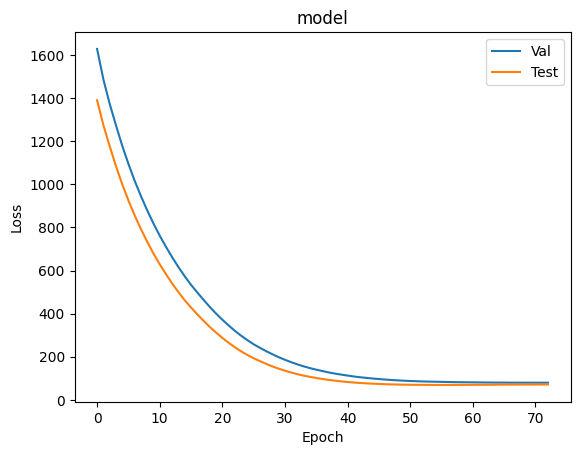

In [39]:
samples = x_train.shape[0]
n_steps = x_train.shape[1]
features = x_train.shape[2]

print("X_train shape: {}".format(samples))
print("X_test shape: {}".format(n_steps))
print("y_train shape: {}".format(features))

def lstm_model():
    # create and fit the LSTM network
    model= Sequential()
    model.add(LSTM(100,batch_size=samples, input_shape=(n_steps,features)))#feature 75
    model.add(Dense(10))
    #rmse
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Define early stopping criteria
    early_stopping = EarlyStopping(monitor='val_loss', patience=17, verbose=1, restore_best_weights=True)
    history=model.fit(x_train,y_train,batch_size=30, epochs=300,validation_data=(x_val, y_val),callbacks=early_stopping, verbose=2)
    model.save('models/lstm_model.h5')
    model.summary()
    return model,history

model,history = lstm_model()
print(lstm_model())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Val', 'Test'], loc='upper right')
plt.show()

In [40]:
from sklearn.metrics import accuracy_score
yhat=model.predict(x_test)
print(accuracy_score(yhat,y_test))

3/3 [==============================] - 1s 17ms/step


ValueError: Classification metrics can't handle a mix of continuous-multioutput and continuous targets